<a href="https://colab.research.google.com/github/mrromaniuc/quantum-computing/blob/main/QC_Executing_Quantum_Circuits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install qiskit
!pip install qiskit-aer
!pip install qiskit-visualization
!pip install qiskit-ibm-provider
!pip install qiskit-experiments
!pip install imgaug==0.2.5
!pip install pylatexenc

In [2]:
#Setting configuration to use matplotlib in drawings
!mkdir ~/.qiskit
!echo "[default]" > ~/.qiskit/settings.conf
!echo "circuit_drawer = mpl" >> ~/.qiskit/settings.conf
!more ~/.qiskit/settings.conf


#
# Loading IBM credentials
#
API_TOKEN_DIR="/content/drive/'My Drive'/'Colab Notebooks'/QC"
API_TOKEN_FILE="MY_API_TOKEN.txt"

#Mount the google drive first
from google.colab import drive
drive.mount('/content/drive')
#%cd /content/drive/'My Drive'/'Colab Notebooks'/QC
%cd $API_TOKEN_DIR

#Read the MY_API_TOKEN from file...
from qiskit_ibm_provider import IBMProvider
MY_API_TOKEN = ""
with open(API_TOKEN_FILE) as f:
  MY_API_TOKEN=f.readline()
IBMProvider.save_account(MY_API_TOKEN, overwrite=True)

[default]
circuit_drawer = mpl
Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/QC


References:
* https://qiskit.org/documentation/apidoc/execute.html
* https://qiskit.org/documentation/tutorials/circuits/1_getting_started_with_qiskit.html
* https://youtu.be/8mrPNSctRIg (transpile)


## Defining the circuit

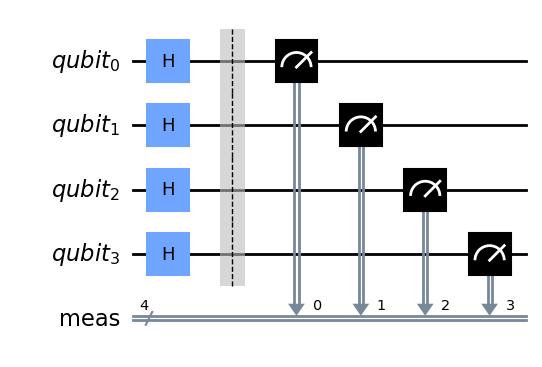

In [4]:
from qiskit import QuantumCircuit, QuantumRegister

qr = QuantumRegister(4, 'qubit')
qc = QuantumCircuit(qr)
qc.h(qr)
qc.measure_all()
qc.draw()

## Running on the backend

### Getting a provider

In [5]:
#Show the backends
from qiskit_ibm_provider import IBMProvider

provider = IBMProvider(instance="ibm-q/open/main")
provider.backends()

[<IBMBackend('ibmq_manila')>,
 <IBMBackend('ibm_perth')>,
 <IBMBackend('ibmq_qasm_simulator')>,
 <IBMBackend('ibmq_lima')>,
 <IBMBackend('simulator_mps')>,
 <IBMBackend('simulator_statevector')>,
 <IBMBackend('simulator_stabilizer')>,
 <IBMBackend('ibm_nairobi')>,
 <IBMBackend('ibm_lagos')>,
 <IBMBackend('ibmq_jakarta')>,
 <IBMBackend('ibmq_quito')>,
 <IBMBackend('ibmq_belem')>,
 <IBMBackend('simulator_extended_stabilizer')>]

### Running on a real QC (in the backend)

About to run on backend ibm_perth
Job Status: job has successfully run


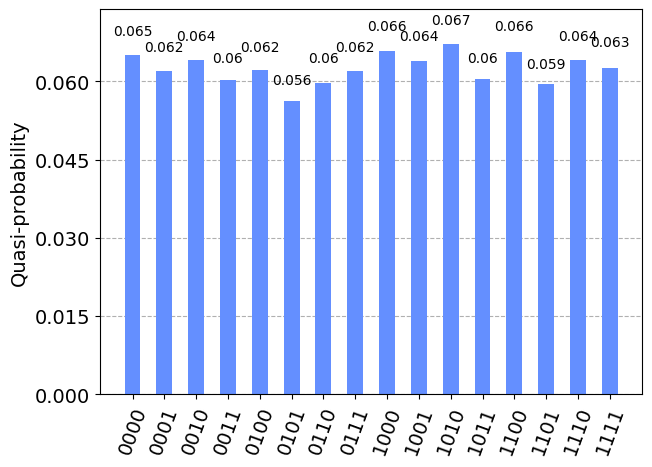

In [7]:
#Checking the least busy QC in the backend
from qiskit import transpile
from qiskit_ibm_provider import least_busy
from qiskit.tools import job_monitor
from qiskit.visualization import plot_distribution

bend = []
for b in provider.backends():
  if (not b.simulator):
    bend.append(b)
least_busy_be = least_busy(bend)
print(f"About to run on backend {least_busy_be.name}")

qc_trans = transpile(qc, backend=least_busy_be)

job = least_busy_be.run(qc_trans, shots=10000)
job_monitor(job)
counts = job.result().get_counts()
plot_distribution(counts)

### Running on a simulator (in the backend)

Job Status: job has successfully run


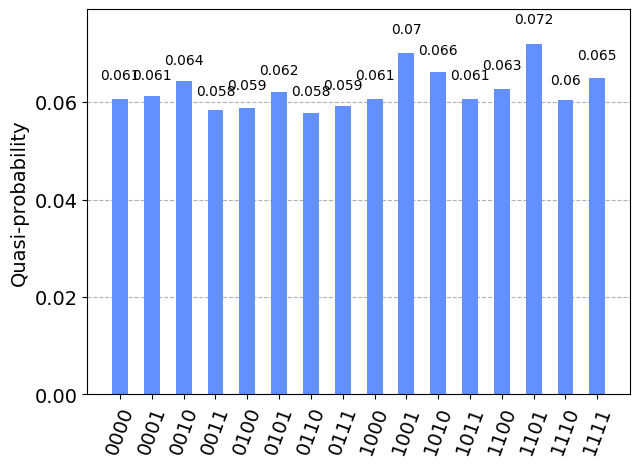

In [8]:
#Run on qasm simulator
from qiskit.tools import job_monitor
from qiskit.visualization import plot_distribution

backend = provider.get_backend("ibmq_qasm_simulator")
job = backend.run(qc, shots=10000)
job_monitor(job)
counts = job.result().get_counts()
plot_distribution(counts)

## Running localy on a simulator

### Running on the basic simulator - AerBasic

qasm_simulator
statevector_simulator
unitary_simulator
Job Status: job has successfully run


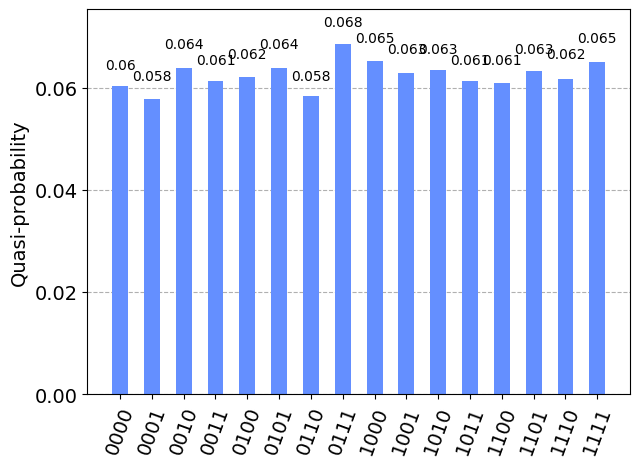

In [10]:
from qiskit import BasicAer, transpile
from qiskit.tools import job_monitor
from qiskit.visualization import plot_distribution

#List the backends available
for be in BasicAer.backends():
  print(be)

be = BasicAer.get_backend("qasm_simulator")

qc_trans = transpile(qc, be)

job = be.run(qc_trans, shots=10000)
job_monitor(job)
counts = job.result().get_counts()
plot_distribution(counts)

### Running on the Aer simulator

aer_simulator
aer_simulator_statevector
aer_simulator_density_matrix
aer_simulator_stabilizer
aer_simulator_matrix_product_state
aer_simulator_extended_stabilizer
aer_simulator_unitary
aer_simulator_superop
qasm_simulator
statevector_simulator
unitary_simulator
pulse_simulator
Job Status: job has successfully run


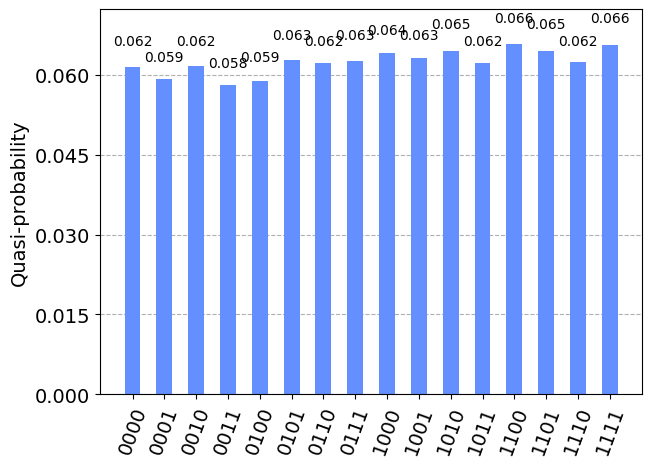

In [12]:
from qiskit import Aer, transpile
from qiskit.tools import job_monitor
from qiskit.visualization import plot_distribution

for be in Aer.backends():
  print(be)

be = Aer.get_backend("qasm_simulator")

qc_trans = transpile(qc, be)

job = be.run(qc_trans, shots=10000)
job_monitor(job)
counts = job.result().get_counts()
plot_distribution(counts)

## Not running, but evolving...

In [24]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.quantum_info import Statevector, DensityMatrix
from qiskit.visualization import array_to_latex

qr = QuantumRegister(4)
qc = QuantumCircuit(qr)
qc.h(qr)

sv = Statevector.from_label('0000')
sv = sv.evolve(qc)
array_to_latex(DensityMatrix(sv))

<IPython.core.display.Latex object>

In [13]:
import qiskit.tools.jupyter
%qiskit_version_table